# Рак Алексей

In [10]:
from Bio import SeqIO
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
data_path = '/home/alex/Yandex.Disk/BSU/Bio2/Практика 2/data/'

# Задание 1

In [3]:
genes = {}

def get_id(s):
    idname = s.split('#')[0]
    return idname[1:-1]

with open(data_path + 'SK926/SK926.fna') as f:
    line = f.readline()
    idname = get_id(line)
    gen = ''
    while line:
        if line[0] == '>':
            genes[idname] = gen
            gen = ''
            idname = get_id(line)
        else:
            gen += line[:-1]
        line = f.readline()
    genes[idname] = gen
    print('genes size: ',len(genes))

genes size:  437619


In [4]:
dic = {}
with open(data_path + 'SK926/SK926.blast_swissprot') as f:
    for line in f:
        t = line.split('\t')
        dic[t[0]] = t[1]
print('dic size',len(dic))

dic size 224143


In [5]:
aname = 'Alphaproteobacteria'
cname = 'Clostridiales'
A = set()
C = set()
with open(data_path + 'SK926/swissprot_db.dat') as f:
    for line in f:
        t = line.split('\t')
        label = t[0];
        if t[2].find(aname) != -1:
            A.add(label)
        if t[2].find(cname) != -1:
            C.add(label)
print(aname,' founded: ',len(A))
print(cname,' founded: ',len(C))

Alphaproteobacteria  founded:  1757
Clostridiales  founded:  4320


In [6]:
def get_codons(s, codons, count):
    for i in range(0, len(s) - 2, 3):
        if s[i:i + 3] in codons:
            codons[s[i:i+3]] += 1
        else:
            codons[s[i:i+3]] = 0
        count += 1
    return count

In [7]:
A_codons = {}
C_codons = {}
A_count = 0
C_count = 0
for key in dic.keys():
    if dic[key] in A:
        A_count = get_codons(genes[key], A_codons, A_count)
for key in dic.keys():
    if dic[key] in C:
        C_count = get_codons(genes[key], C_codons, C_count)
        
print('A codons: ', A_count)
print('C codons: ', C_count)

A codons:  1397702
C codons:  6717972


In [11]:
print ("\tA\tC\t")
keys = []
A_values = []
C_values = []
for key in sorted(A_codons.keys()):
    keys.append(key)
    A_values.append(A_codons[key]/A_count*100)
    C_values.append(C_codons[key]/C_count*100)
    print("%s\t%.4f\t%.4f" % (key,A_codons[key]/A_count*100,C_codons[key]/C_count*100))

	A	C	
AAA	3.0740	3.3681
AAC	2.0529	1.9431
AAG	2.7550	3.7587
AAT	2.1947	2.1301
ACA	1.4034	1.9591
ACC	1.8085	1.6239
ACG	1.3809	1.0049
ACT	0.9458	0.8436
AGA	0.6651	1.3781
AGC	1.2286	1.1440
AGG	0.3187	0.2806
AGT	0.8268	0.6603
ATA	1.1424	0.9216
ATC	3.4411	3.5012
ATG	3.0921	3.0134
ATT	2.5119	2.5418
CAA	0.8938	0.3656
CAC	0.7042	0.7942
CAG	2.5194	2.6902
CAT	1.0197	1.1485
CCA	0.4567	0.6126
CCC	0.8856	0.6290
CCG	1.7013	1.6768
CCT	0.8534	0.7448
CGA	0.2688	0.1751
CGC	1.3836	1.1225
CGG	0.7353	0.5208
CGT	1.2649	1.2924
CTA	0.2629	0.1120
CTC	1.3060	0.9359
CTG	3.5631	3.1096
CTT	1.7181	2.2327
GAA	3.7756	4.1993
GAC	2.4447	2.5300
GAG	2.6987	3.7190
GAT	2.9140	3.6829
GCA	2.3434	3.1967
GCC	2.7123	1.8260
GCG	1.7304	1.5002
GCT	1.7498	1.7138
GGA	2.1110	2.4002
GGC	2.4331	2.5995
GGG	0.7576	0.5156
GGT	1.9465	2.1458
GTA	1.8057	2.0718
GTC	1.5717	1.2738
GTG	2.4004	1.9373
GTT	1.5320	2.0689
TAA	0.1236	0.1549
TAC	1.4041	1.3335
TAG	0.0291	0.0368
TAT	2.2699	2.1688
TCA	0.6815	0.7513
TCC	1.3109	1.1843
TCG	0.9359	0.4778
TCT	

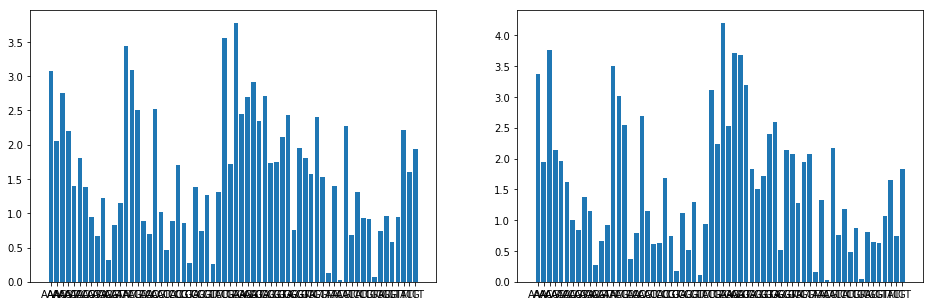

In [25]:
fig, axes = plt.subplots(ncols=2, figsize=(16, 5))
axes[0].bar(keys, A_values)
axes[1].bar(keys, C_values)
plt.show()

# Задание 2

In [4]:
ptt_file1 = data_path + 'NC_012659.ptt'
ptt_file2 = data_path + 'NC_014500.ptt'

In [5]:
class Gene:
    def __init__(self, line):
        self.data = line
        self.name = self.data[4]
        
        
    def find(self, line):
        return self.data[-1].find(line) != -1
        
        
    def __str__(self):
        return self.name + ' - ' + self.data[-1]

In [9]:
class Genome:
    def __init__(self, path):
        with open(path) as f:
            lines = f.readlines()
        self.name = lines[0].split(',')[0]
        self.data = []
        for line in lines[3:]:
            gene = Gene(line[:-1].split('\t'))
            if gene.name != '-':
                self.data.append(gene)
            
    def __len__(self):
        return len(self.data)

    
    def __str__(self):
        return self.name

        
    def get_functions(self, s):
        for gene in self.data:
            if gene.find(s):
                yield gene
                
    
    def get_common_gene_names(self, other):
        names = set()
        for gene in self.data:
            names.add(gene.name)
        ans = set()
        for gene in other.data:
            if gene.name in names:
                ans.add(gene.name)
        return ans

In [10]:
genome1 = Genome(ptt_file1)
genome2 = Genome(ptt_file2)
print(genome1, 'has', len(genome1), 'genes')
print(genome2, 'has', len(genome2), 'genes')
print()
search_string = 'chaperone'
for gene in genome1.get_functions(search_string):
    print(genome1, 'has', gene)
print()
for gene in genome2.get_functions(search_string):
    print(genome2, 'has', gene)
print()
common_genes = genome1.get_common_gene_names(genome2)
print('%s ans %s have %d genes in common' % (genome1, genome2, len(common_genes)))

Bacillus anthracis str. A0248 has 1158 genes
Dickeya dadantii 3937 chromosome has 2546 genes

Bacillus anthracis str. A0248 has csaA - chaperone CsaA
Bacillus anthracis str. A0248 has narJ - nitrate reductase molybdenum cofactor assembly chaperone
Bacillus anthracis str. A0248 has hscC - chaperone protein hscC
Bacillus anthracis str. A0248 has dnaJ - chaperone protein DnaJ
Bacillus anthracis str. A0248 has dnaK - molecular chaperone DnaK

Dickeya dadantii 3937 chromosome has ibpA - heat shock chaperone
Dickeya dadantii 3937 chromosome has ibpB - heat shock chaperone
Dickeya dadantii 3937 chromosome has hslU - molecular chaperone and ATPase of HslUV protease
Dickeya dadantii 3937 chromosome has hlpA - periplasmic chaperone
Dickeya dadantii 3937 chromosome has htpG - molecular chaperone HSP90 family
Dickeya dadantii 3937 chromosome has clpA - ATPase and specificity subunit of ClpA-ClpP ATP-dependent serine protease, chaperone activity
Dickeya dadantii 3937 chromosome has lolA - chaperone